In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import preprocessing

import pyLDAvis
from pprint import pprint

#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.base import BaseEstimator, TransformerMixin
#from sklearn.pipeline import FeatureUnion
#from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score
#from imblearn.over_sampling import SMOTE 
from os import path
from wordcloud import WordCloud, STOPWORDS 
from PIL import Image
from wordcloud import ImageColorGenerator
import re
import pickle
import joblib
import spacy

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import numpy as np
from nltk import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
#from textblob import TextBlob
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime
import warnings
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from bs4 import BeautifulSoup
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary

C:\Users\Tanisha Batra\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
raw_df= pd.read_csv(r'G:/Symbi/Dataset/TelecomPOC.csv',encoding='unicode-escape', parse_dates=[1])
raw_df.head()
neg = raw_df[raw_df.Sentiment=='Negative']

#neg = neg.reset_index(drop=True)
text = neg.Tweet.dropna()
#text = raw_df.Tweet.dropna()
#print(text)
type(text)

#raw_df= raw_df[pd.notnull(raw_df['Tweet'])] #Delete rows where Tweet is null.

pandas.core.series.Series

In [72]:
print(text[243])

@DoT_India Thanks for the reply @DoT_India. But, how many times in a day it shall played? Everyday I'm getting this instruction 3 to 6 times from @ViCustomerCare. It's really annoying when we supposed to call in an emergency. It's really ok to play once in a day. Not more than that.


In [102]:
#!/usr/bin/env python
import re

def deEmojify(raw_text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u20b9"  
        u"\u274c" u"\u2620\ufe0f"                       
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',raw_text)

text1 = deEmojify(text[603])
print(text1)
text1 = text1.lower()

#.\U0001f621\U0001f621\U0001f621

@ViCustomerCare  Currently am in Bangalore. Hosakerehalli BSK 3rd stage Bangalore 560085. From yesterday I am facing Network issue. Internet totally down. Forgot about rural in city am struggling to find network on VI so pathetic.🤔🤔


In [103]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

text1 = deEmojify(text[603])
print(text1)

@ViCustomerCare  Currently am in Bangalore. Hosakerehalli BSK 3rd stage Bangalore 560085. From yesterday I am facing Network issue. Internet totally down. Forgot about rural in city am struggling to find network on VI so pathetic.


In [76]:
def clean_text(RawSentence):
    """
    removing all emojis, hashtags , punctuations, stop_words  and links, also stemming words 
    """
    txt = RawSentence    
    #print(txt)
    txt = txt.lower()
    
    #word_tokens = word_tokenize(RawSentence)    
    
    lemma = WordNetLemmatizer()
    nlp = spacy.load('en_core_web_sm') 

    stop_words = set(stopwords.words('english'))
    stop_words.update(["amp", "rt", "cc"]) # adding twitter specific stop words
    #stop_words = stop_words - set(['no', 'not','nil'])  #removing No, not, nil from stop words     
    stop_words.update(["worst","airtelpresence","sunday","monday","tuesday","wednesday","thursday","friday","saturday","till",
                       "weekend","apparently","extremely","worse","consolation","shouldnt","wont","arent","folks","hathway",
                     "better", "other","instead","look","yesterday","unacceptable","miss","couldnt","depress","let","good","one",
                     "thank","record","actually","frustrate","correct","ridiculous","expect","different","pathetic","terrible",
                     "bother","follow","fault","impossible","point","cover","person","ask","speak","things","earlier","mean","select","minutes",
                     "horrible","airtel","hear","current","shall","issue","start","empty","please","check","good","give","four","get", "face", 
                     "literally","years","surprise","compensate","helpful","upset","excuse","attention","attach","two","three",
                     "situation","multiple","jaipur","choose","company","believe","question","anymore","awful","mumbai","month",
                      "koida","completely","finally", "waste","shock","annoy","maybe","strand","mess","finally","proper","consolation",
                      "plan","place","apology","center","plan","twitter","promise","prefer","count","maybe","shock","longer","meet","play","development",
                      "important","drop","break","reason", "wont","days","first","second","third","attempt","officially","absolutely","hello","yet","know","jio",
                      "january","february","march","april","may","june","july","august","september","october","november","december","without","thankyou",
                      "vodafone","taluk","vodafoneidea","vicustomercare","vowifi","voda","reliancejio","jiocare"])

    txt = re.sub(r"(@\S+)", "", txt)  # remove @
    txt = re.sub(r'\W', ' ', str(txt)) # remove all special characters including apastrophie 
    txt = txt.translate(str.maketrans(' ', ' ', string.punctuation)) # remove punctuations 
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters from within the text (it's -> it s then we need to remove s)
    txt = re.sub(r'\^[a-zA-Z]\s+', ' ', txt) # remove all single characters from beginning of the text 
    txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
    txt = re.sub(r"(http\S+|http)", "", txt) # remove links 
    #txt = re.sub(r'^b\s+', '', txt) # generally used when text is scrapped online. 'b' is prefixed often indicating binary text. This is not reqd for us 
    txt = [re.sub('\s+', ' ', t) for t  in txt]     # Remove new line characters
    txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
    txt = ' '.join([i for i in txt.split(" ") if i not in stop_words])   # split() is native tokenizer in Python
    #txt = ' '.join(lemma.lemmatize(word) for word in txt.split())           # Used lemmatizer later 
    #txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") if word not in stop_words ]) # stem & remove stop words
    #soup = BeautifulSoup(txt) #to scrap information from web pages....not needed here
    #txt = soup.get_text
    
    def deEmojify(inputString):
        return inputString.encode('ascii', 'ignore').decode('ascii')
        regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u20b9"  
        u"\u274c" u"\u2620\ufe0f"                       
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',raw_text)
    
    def stem_tokens(tokens, lemmatize):
        lemmatized = []
        for item in tokens:
            lemmatized.append(lemma.lemmatize(item,'v'))
        return lemmatized
    
    txt = deEmojify(txt)
    tokens =[]
    
    excluded_tags = {"ADJ", "ADV", "ADP", "PROPN","CCONJ","AUX","DET","PRON","VERB"}
    for token in nlp(txt):
        if token.pos_ not in excluded_tags:
            tokens.append(token.text)
    
    lemm = stem_tokens(tokens, lemma)
    #tokens = nltk.word_tokenize(txt)
    tokens = [ch for ch in lemm if len(ch)>2] #remove words with character length below 3
    #tokens = [ch for ch in tokens if len(ch)<=15] #remove words with character length above 15 
    print(txt)    
    return tokens
    

In [81]:
#Testing for word tokens and creation of bigram and trigrams 
#print('Original Text : ',raw_df['Tweet'])
#print('Processed Text : ',clean_text(raw_df['Tweet']))
docs = text.apply(clean_text)
#clean_text = clean_text(text)

port agents
internet services depressing
jiofraud action complaint amount recharge got wasted return money
recharging  showed failed tried found got recharged twice tried calling customer care ended answering machine need refund
 response
response mere
resolve recharge number
g given although gb data every network since evening attached accounts hence transactions done due otp unavailable
 network since last week vi store asking contact customer care saying cannot resolve contact vi store playing passing parcel plz help connect
want port number register request able send sms poor network
used data mb per data monitor app says used half data happening
refunding security deposit  following guys since half rob customers like
status complaint srnskf raised complaint th still internet working
network sucks
pls ur high speed internet getting charged g getting even speed g
trying fiber connection paid th activated  support resolution team false claims made incorrect installation done connecte

wrong network data poor network
fastest g country
hi want port number network kindly help unable send sms
thanks strong network paying bill postpaid getting service fair pls chek else time move
net speed slow problem vi number   complaint data speed reference number raj v registered
ashamed something vi network continuously send complaint social media helpline number  network anything sad thing
despite dnd service number vi sending it advertising messages number
utterly disappointed retention team customer base soon lost retention offer given port never made effective never intimated email invalidating
poor internet area nanded city pune
dear signals g poor service last option switch another operator
vi mobile network poor connectivity poor network vi network busy making people full
much emberresing covid caller tune everytime call someone year pls remove number never heard cant port vi number
lot network changed sim  times still network register complaint   times response solve proble

make calls recharged top unlimited balance people villages use internet recharge higher denominations
want port share detail reach lazy don care call grievances
pnt can make call always telling wrong number every number prefix  also can make call
number  idea celluar port port bsnl due number deactivated contacted bsnl office told number  transferred idea cellular due port
contacted vi store reissuing said number told said number activated request vi cannot allot number customer shut
fix problem vodafonedown internetshutdown portvi
able send sms getting failed message sent error  help
sir request allot said number number used many purposes
lots time complained network vi customer care  problem resolved problem location network automatically switched g g last months  resolved problem
hi team saw vas got activated account amount inr  deducted want discontinue service since reporting within  hours want refund back guys need loot customers
per discussion even want send  sms  recharge requi

explain bill changed informing
received inbox massage bill pay last week commitment given  need pay  rest  wave making payment  following last week waver  vi asking pay  co pltuogrfeu
still waiting someone touch need wait assume abusing part culture vi customer care
service mistake continue india keep charging additional service charge subscribed force file complaint consumer forum
complained charged international roaming wrongfully  times solution today told  waver next bill could given compassion joke customers
guys changing existing postpaid customer consent unethical practices trustworthy shame
g connectivity  co aspzpicpn
guys changing existing postpaid customer consent unethical practices trustworthy shame
seriously deserve loss subscribers trying bound customers damn disgusting plans like minimum recharge  rupees send sms matter  rupees already acnt hell services ready shut
true vi service provider
decline sure thanks hell customer centric services idea go hell
high g speed vi  

months words iam raising requests vi responding  co iasieqvalm
way gst invoice prepaid recharge planning unlimited pack recharge gst invoice
still action tool even replying message tweets help
smart city like vadodara network geri gotri g netwok already port network want resolve network problem  co xtouyhbko
waiting  yrs indoor coverage improve several complaints qos dropped level recharge voucher gone improvement qos move provider cheaper yearly vi
network continues borli panchatan shriwardhan raigad looting people name g connectivity  responsible work shame vi bsnl bestest
already lost using deceptive means retain customer non vigilant customer would sent sms realise porting request cancelled sad state events
wrong wid dis vi hw many yrs needed solve power backup prblm  nonetwork rd tym still der network nutshell dis jst temporarily solved shame noservice  co ukgfelr
appears understand simple english told connections signals even though bars showing mobile working area indicated twee

could resolved immediately team fake commitment customers providing resolution responding tweets shows worthless able resolve customer issues
reply called self claimed fastest network india wifi calling extra cost 
costumer service problem accessing internet last  weeks location even complaining many times nothing happened
poor services
network poor services customer care executive rude people suffering network service go false promises like unlimited data etc speed andhra region
someone looting public come fabricated stories shameonstarhealth  co nsjmyefef
currently bangalore hosakerehalli bsk rd stage bangalore  facing network internet totally forgot rural city struggling find network vi
number disabled reasons guys still service closed shop already
recharge expiry day day guys begging repetitively  concern replying like bot think useless support system leave   feedback
made port request  neither got money back sim deliever
networks anytime call network drops sometime comes normals f

allow charge rs port msg say recharge rs  msg rs   msg
still waiting resolution
providing g data speed price g  co zzznwlaox
vi user past internet working data pack tried troubleshooting steps tried contacting replies really late help fix problem
network sleeping idiots
name rathod sandeep telangana adilabad neradigonda borigoan mppsc school borigam  service location land tower installation location contact
customer service ever called times customer care resolve resolve every time called say servers call us back  hrs thinking portability networks
replied already help
nmbers post paid charged subscribed harassing cannot port clearing dues dues justified experience
hold little need us time hard
urge everyone see tweet ever harassing customers help matter
got call today sir escalating tired repeating plz frm ur team make assumptions refrain frm passing judgements urge guys read  emails reminders  complaints closed resolution incoming vi call proofs shared
lake offers lake towers network 

lost sim hence want replacement sim visiting vi store forced take postpaid sim replacement
dissapointed service rd day still complaint addressed call back update postpaid customers treated like wonder condition prepaid users poor disappointing service
hey vi jst  tell tat recharge vi ended nd recharge want received  calls last  telling  recharge  single call ppl swear r gonna loose  user ur already going times
shweta part english understand shame reply vi wants steal money business
assist port number unable since past  months due vi network issues
single number vi able connect number understand bad service vi area exact pin location mine
 hours send details email still response vi amazing customer care service
 solved problem seriously thinking port ya card also problem  co cutdtrw
received message complaint resolved still problem stop jokes
dont understand simple problem everyday people
minimum  sms crazy
update
 solved problem seriously thinking port remind card also problem idea alw

still recharge problems resolved immediately since massaging vi details dm results
idea sending bill every closed sim service provider service provider existing country like india vi sucking money providing service  co erzaaisro
solution provided vi says responsible anything  co savreq
sir inspite validity balance number cant send sms told per rules min rc needed sms facility irrational true scrap
pay g data mobile data g data working say india g network
facing past   wait  sep unable call nd receive calls otps experience
seems doesnt care losing customer anyways made   calls average backup number still forcing buy expensive post paid   calls per already earning profit  co zgjxjpukp
seding msg isnt reply late service services time time port
want change postpaid prepaid guide necessary steps
dear activated vas end system activated charged balance informed text message pls remove put back balance
trying contact vi customer care last  unable whenever try call   connect chat service idea v

facing last  months solved
enjoy tv channels live news exclusive content favourite ott platforms right vi app download
facing problem last  months solved
call waiting response
hi team filled details pls connect number sending via dm
self arun sharma faridabad contact  resolve service
direct customer care number
ok portout number thanks
charges
prepaid recharge showing according cse cse says go back gallery many times go gallery  thing fed inefficiency
shital still received call side
prepaid customer unable call reliance numbers tried calling customer care option technical error dont reach resolve
ur employee call rude hung kindly solve problem asap
internet speed kbps fast internet  co fuhig
 visits vi store still given replacement sim address bj patel road malad west employee name sushmakant
co myyhltxalc dear unbanned website network website otherwise portout
services stopped short time regular number would also lost best services provided telecom companies great
per vi app seen  gb 

speed vi like g  co lniyyur
facing network chhalera noida resolve
want type diplomatic answer want port kindly ans porting completed
vi post paid number belongs mother  old sim working showing network asked told mother need visit vi store replace sim home delivery
moved sim old phone new showing invalid sim working old phone well think sim must got corrupted quite old new sim number urgent
responding
frc rs    gb data credited account unfortunate indeed
outgoing services terminated despite making double payments provide refund asap online customer care failed resolve resume services low vi go
recharged number mins ago amt  received successful transaction
pic promised pic delivered
customer service ever called times customer care resolve
wonderful network sims used well done vi tha
increase internet speed home location suggestion
want ott services need network enough
nd time  long waiting period complained regarding network ended copy paste solution problem remain poor internet voice ca

dear cce told already used  data daily limit per app showing  gb left right able use g data indoor
surprised complaint registered trying register complaint almost refused even share appllette nodal officers numbers switching
cannot port request recharged  moreover network leaves option vi well


In [87]:
#docs.to_csv(r'G:/Symbi/Outcome/Tokens with Emoji removed.csv', index=False)

1088


In [84]:
#Make Bigrams and trigrams 

#neg['token']=neg.Tweet.map(clean_text)
#docs = neg['token'].to_numpy()
docs = docs.to_numpy()

# Add bigrams and trigrams to docs,minimum count 2 means only that appear 2 times or more. Higher threshold means fewer phrases
bigram = gensim.models.Phrases(docs, min_count=2,threshold=10)
#trigram = gensim.models.Phrases(bigram[docs],threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

# Form Bigrams
bigram_token = make_bigrams(docs)

#gram_token =[]
#for idx in range(len(docs)):
#    for token in bigram[docs[idx]]:
#        if '_' in token:
#            # Token is a bigram, add to document.
#            docs[idx].append(token)
#            gram_token[idx].append(token)
#    for token in trigram[docs[idx]]:
#        if '_' in token:
#            # Token is a trigram, add to document.
#            gram_token[idx].append(token)
#            #docs[idx].append(token)

In [85]:
# Creation of Dictionary and Corpus 
from gsdmm import MovieGroupProcess

import warnings
warnings.simplefilter('ignore')

#dictionary = corpora.Dictionary(bigram_token)   # Used Gensim command to create the dictionary
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=4, no_above=0.10)
# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)

#Filter out tokens that appear in Less than no_below documents (absolute no), 
# and in more than no_above documents (fraction). after (1) and (2), keep only the first keep_n most frequent tokens (or keep all if None)

#corpus = [dict1.doc2bow(text, allow_update=True) for text in bigram_token]    #allow_update=True was updating dictionary, so each token frequency was double
corpus = [dictionary.doc2bow(text) for text in docs]
dictionary.save_as_text('G:/Symbi/Outcome/dictionary1.txt')
pickle.dump(corpus, open('gensim_corpus.pkl', 'wb'))
dictionary.save('G:/Symbi/Outcome/dictionary.gensim')
print('Number of unique Normal Dictionary tokens: %d' % len(dictionary))


Number of unique Normal Dictionary tokens: 222


In [116]:
%%time
# initialize GSDMM
gsdmm = MovieGroupProcess(K=5, alpha=0.1, beta=0.3, n_iters=50)

# fit GSDMM model
y = gsdmm.fit(docs, vocab_length)

# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
top_index = doc_count.argsort()[-15:][::-1]
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to

print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        print("Cluster %s : %s"%(cluster, doc_count[cluster]))
        
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("Cluster %s : %s"%(cluster, sort_dicts))
    
# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 10)

In stage 0: transferred 782 clusters with 5 clusters populated
In stage 1: transferred 557 clusters with 5 clusters populated
In stage 2: transferred 455 clusters with 5 clusters populated
In stage 3: transferred 419 clusters with 5 clusters populated
In stage 4: transferred 386 clusters with 5 clusters populated
In stage 5: transferred 391 clusters with 5 clusters populated
In stage 6: transferred 382 clusters with 5 clusters populated
In stage 7: transferred 369 clusters with 5 clusters populated
In stage 8: transferred 369 clusters with 5 clusters populated
In stage 9: transferred 360 clusters with 5 clusters populated
In stage 10: transferred 368 clusters with 5 clusters populated
In stage 11: transferred 402 clusters with 5 clusters populated
In stage 12: transferred 381 clusters with 5 clusters populated
In stage 13: transferred 385 clusters with 5 clusters populated
In stage 14: transferred 344 clusters with 5 clusters populated
In stage 15: transferred 370 clusters with 5 clust

In [12]:
# import library from gensim  
from gensim.models import CoherenceModel

# define function to get words in topics
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

# get topics to feed to coherence model
topics = get_topics_lists(gsdmm, top_index, 10) 
print(topics)


[['customer', 'data', 'plan', 'service', 'bill', 'usage', 'change', 'cus', 'offer', 'charge'], ['service', 'number', 'customer', 'port', 'network', 'call', 'since', 'connection', 'message', 'care'], ['connection', 'internet', 'speed', 'call', 'time', 'service', 'connectivity', 'customer', 'fiber', 'line'], ['network', 'service', 'complaint', 'time', 'speed', 'internet', 'problem', 'day', 'area', 'number'], ['speed', 'network', 'service', 'internet', 'customers', 'mbps', 'issue', 'area', 'since', 'data']]


In [14]:
# evaluate model using Topic Coherence score
cm = CoherenceModel(model=gsdmm, topics=topics,dictionary=dictionary, corpus=corpus, texts=docs, coherence='u_mass')
cm_gsdmm = CoherenceModel(model=gsdmm, topics=topics, dictionary=dictionary, corpus=corpus,texts=docs, coherence='c_v')

coherence_umass = cm.get_coherence()  # get coherence value
coherence_gsdmm_cv = cm_gsdmm.get_coherence()   # get coherence value

print(coherence_gsdmm)

In [81]:
def compute_coherence_values(dictionary, corpus, texts, start, stop):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
  
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, alpha='auto',
                                                eta='auto', per_word_topics=True)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(coherence_values)
        
    return model_list, coherence_values

In [82]:
start=3
stop=18
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=bigram_token,
                                                        start=start, 
                                                        stop=stop)

[0.559169019174418]
[0.559169019174418, 0.5265019712319777]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0.5477083407969194]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0.5477083407969194, 0.5218562048373723]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0.5477083407969194, 0.5218562048373723, 0.5214469003409311]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0.5477083407969194, 0.5218562048373723, 0.5214469003409311, 0.532912897696259]
[0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0

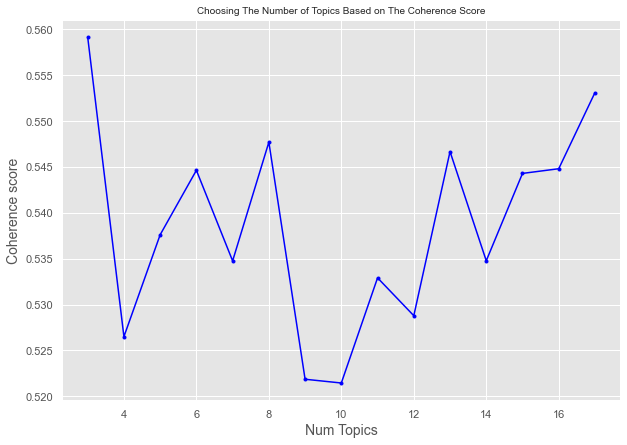

range(3, 18) [0.559169019174418, 0.5265019712319777, 0.5376123715262506, 0.5446421526692162, 0.5347636659660907, 0.5477083407969194, 0.5218562048373723, 0.5214469003409311, 0.532912897696259, 0.5287871663414482, 0.5466797993257485, 0.5347787966344195, 0.544302313996722, 0.5448123350332257, 0.5531167433056647]


In [83]:
x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('ggplot')
plt.plot(x, coherence_values, color = "blue",marker=".")
plt.xlabel("Num Topics", size=14)
plt.ylabel("Coherence score", size=14)
plt.title('Choosing The Number of Topics Based on The Coherence Score',size=10)
plt.show()
print(x,coherence_values)

In [74]:
%%time

from gensim import corpora, models
from gensim.models import TfidfModel
from gensim.models.basemodel import BaseTopicModel

# Build TF-IDF LDA model
tfidf=gensim.models.tfidfmodel.TfidfModel(corpus=corpus, id2word=dictionary, normalize=True, smartirs='ntc', pivot=None, slope=0.25)
corpus_tfidf = tfidf[corpus]

# Set parameters.
num_topics = 8  #number of topics. Each topic is combination of keywords. Each keyword contributes a certain weightage to topics
chunksize = 15    #number of documents to be used in each training chunk
passes = 5       #total number of training passes through the corpus .
iterations = 15  #Maximum number of iterations through the corpus when inferring the topic distribution of a corpus. Higher value aids to reproducability because it is closer to convergence
eval_every = 1   #how often the model parameters should be updated
#alpha = document- topic density 
#eta = topic - keyword density

lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,num_topics=num_topics,
                                           id2word=dictionary,alpha='symmetric',chunksize=5,iterations=iterations,passes=5,eta=0.01)
                                           #eval_every=1, eta=[0.01]*len(dictionary.keys()))
                                           #random_state=12,        
#id2word=dictionary,alpha='auto',chunksize=5,iterations=iterations,passes=5,eta='auto')        
#pprint(lda_model.print_topics())
#lda_model.show_topic(5)
#for doc in corpus_tfidf:
#    print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])

print('\n \n TFIDF')
for idx, topic in lda_model1.print_topics(-1):
    print('Topic: {} \nWord: {}'.format(idx, topic))
    
#pprint(tfidf_model.print_topics())


 
 TFIDF
Topic: 0 
Word: 0.250*"amount" + 0.225*"money" + 0.181*"complaint" + 0.006*"message" + 0.006*"india" + 0.006*"night" + 0.006*"bill" + 0.006*"till" + 0.006*"year" + 0.006*"broadband"
Topic: 1 
Word: 0.015*"charge" + 0.015*"india" + 0.015*"bill" + 0.015*"till" + 0.015*"year" + 0.015*"message" + 0.015*"thank" + 0.015*"work" + 0.015*"complaints" + 0.015*"phone"
Topic: 2 
Word: 0.707*"internet" + 0.097*"response" + 0.003*"charge" + 0.003*"bill" + 0.003*"till" + 0.003*"year" + 0.003*"message" + 0.003*"thank" + 0.003*"work" + 0.003*"complaints"
Topic: 3 
Word: 0.015*"charge" + 0.015*"india" + 0.015*"bill" + 0.015*"till" + 0.015*"year" + 0.015*"message" + 0.015*"thank" + 0.015*"work" + 0.015*"complaints" + 0.015*"phone"
Topic: 4 
Word: 0.015*"charge" + 0.015*"india" + 0.015*"bill" + 0.015*"till" + 0.015*"year" + 0.015*"message" + 0.015*"thank" + 0.015*"work" + 0.015*"complaints" + 0.015*"phone"
Topic: 5 
Word: 0.847*"port" + 0.002*"thank" + 0.002*"night" + 0.002*"bill" + 0.002*"till"

In [43]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=bigram_token, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -91.05311110760317

Coherence Score:  0.5138350107088253


In [41]:
lda_model1.show_topics(formatted=True)

[(0,
  '0.013*"start" + 0.013*"day" + 0.013*"area" + 0.013*"reach" + 0.013*"plan" + 0.013*"months" + 0.013*"provide" + 0.013*"think" + 0.013*"phone" + 0.013*"experience"'),
 (1,
  '0.013*"start" + 0.013*"day" + 0.013*"area" + 0.013*"reach" + 0.013*"plan" + 0.013*"months" + 0.013*"provide" + 0.013*"think" + 0.013*"phone" + 0.013*"experience"'),
 (2,
  '0.380*"call" + 0.376*"port" + 0.090*"try" + 0.069*"customer_care" + 0.060*"show" + 0.000*"reach" + 0.000*"months" + 0.000*"think" + 0.000*"plan" + 0.000*"money"'),
 (3,
  '0.717*"complaint" + 0.004*"think" + 0.004*"experience" + 0.004*"money" + 0.004*"area" + 0.004*"reach" + 0.004*"plan" + 0.004*"months" + 0.004*"provide" + 0.004*"complaints"'),
 (4,
  '0.954*"internet" + 0.001*"start" + 0.001*"day" + 0.001*"area" + 0.001*"reach" + 0.001*"plan" + 0.001*"months" + 0.001*"provide" + 0.001*"think" + 0.001*"phone"'),
 (5,
  '0.809*"response" + 0.003*"think" + 0.003*"start" + 0.003*"money" + 0.003*"area" + 0.003*"reach" + 0.003*"plan" + 0.003*

In [28]:
lda_model1.save('G:/Symbi/Outcome/lda_model1.model')
lda_model1=models.LdaModel.load('G:/Symbi/Outcome/lda_model1.model')

In [30]:
test_doc = '@Jiocare, my bill is not overdue, please remove the fine'
test_doc = clean_text(test_doc)
bow_test_doc = dictionary.doc2bow(test_doc)

print(lda_model1.get_document_topics(bow_test_doc))

[(0, 0.071428575), (1, 0.071428575), (2, 0.071428575), (3, 0.071428575), (4, 0.071428575), (5, 0.071428575), (6, 0.071428575), (7, 0.071428575), (8, 0.071428575), (9, 0.071428575), (10, 0.071428575), (11, 0.071428575), (12, 0.071428575), (13, 0.071428575)]


In [40]:
# Visualize the topics

%matplotlib inline
#import pyLDAvis.gensim_models as gensimvis
from pyLDAvis import gensim_models
pyLDAvis.enable_notebook()   #enable automatic D3 display of prepared model data in the IPython notebook

vis = pyLDAvis.gensim_models.prepare(topic_model=lda_model1, corpus=corpus, dictionary=dictionary)
pyLDAvis.display(vis)

In [55]:
def format_topics_sentences(ldamodel=lda_model1, corpus=corpus_tfidf, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(lda_model1[corpus_tfidf]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model1.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model1, corpus=corpus_tfidf, texts=docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doc No', 'Dominant Topic', 'Topic Perc Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(20)

,Doc No,Dominant Topic,Topic Perc Contrib,Keywords,Text
0,0,2.0,0.6471,"call, port, try, customer_care, show, reach, m...","[port, agents]"
1,1,4.0,0.6471,"internet, start, day, area, reach, plan, month...","[internet, service, depress]"
2,2,3.0,0.4557,"complaint, think, experience, money, area, rea...","[action, complaint, amount, recharge, waste, r..."
3,3,2.0,0.7175,"call, port, try, customer_care, show, reach, m...","[recharge, show, fail, try, find, recharge, tr..."
4,4,5.0,0.6471,"response, think, start, money, area, reach, pl...",[response]
5,5,5.0,0.6471,"response, think, start, money, area, reach, pl...",[response]
6,6,0.0,0.1429,"start, day, area, reach, plan, months, provide...","[resolve, number]"
7,7,0.0,0.1429,"start, day, area, reach, plan, months, provide...","[give, although, get, data, network, since, ev..."
8,8,2.0,0.4456,"call, port, try, customer_care, show, reach, m...","[network, since, week, store, ask, contact, cu..."
9,9,0.0,0.1429,"start, day, area, reach, plan, months, provide...","[want, port, number, register, request, send, ..."


In [51]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics
df_dominant_topics.to_csv("G:/Symbi/Outcome/topics.csv")

In [53]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
topics = [lda_model1[corpus[i]] for i in range(len(text))]
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

NameError: name 'topics_document_to_dataframe' is not defined

In [129]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0,0,0,0,0,0.455888,0,0.365209,0,0.154186,0,0,0
1,0.000000,0,0,0,0,0,0.558963,0,0.340880,0,0.077085,0,0,0
2,0.000000,0,0,0,0,0,0.354460,0,0.339533,0,0.286787,0,0,0
3,0.000000,0,0,0,0,0,0.277474,0,0.657183,0,0.050317,0,0,0
4,0.077715,0,0,0,0,0,0.455978,0,0.365258,0,0.082538,0,0,0


In [131]:
# Which document are about topic 12
document_topic.sort_values(10, ascending=False)[10].head(20)

31     0.327323
2      0.286787
172    0.238091
45     0.237067
30     0.234783
156    0.230966
139    0.223792
41     0.220255
42     0.219057
46     0.211215
175    0.195147
27     0.187922
113    0.171020
118    0.166540
183    0.163763
117    0.158695
38     0.158230
185    0.156524
0      0.154186
99     0.150898
Name: 10, dtype: float64

In [54]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

NameError: name 'document_topic' is not defined

<AxesSubplot:>

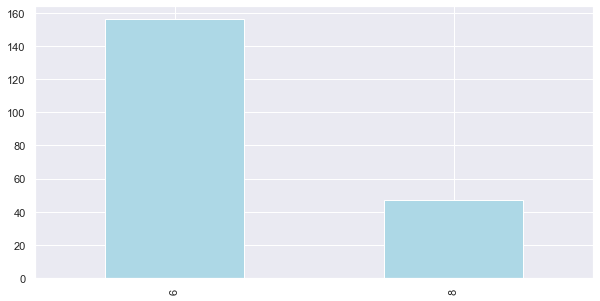

In [136]:

sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [29]:
# importing libraries
import pandas as pd
import numpy as np
import gensim
from gsdmm import MovieGroupProcess

df= pd.read_csv(r'G:/Symbi/Dataset/TelecomPOC New.csv',encoding='utf-8', parse_dates=[1])

#neg = raw_df[raw_df.Sentiment1=='Negative']

#neg = neg.reset_index(drop=True)
#text = neg.Tweet.dropna()
# cast tweets to numpy array
docs = df.Tweet.to_numpy()
print(docs)


[" @Vodafone won't not let me port to @JioCare for no reason. My second attempt and I don't know what to do. Agents are no good. "
 ' @jiocare Jio internet services depressing. '
 '@jiocare #jiofraud, no action in my complaint, my amount of recharge got wasted, return my money'
 '@jiocare Was recharging for Jio 999 plan. When showed failed tried again & found it got recharged twice. Tried calling customer care but ended up with answering machine. I need a refund'
 "@jiocare It's been officially 10 days. Yet, no proper response"
 '@jiocare absolutely no response! Was that a mere consolation? '
 '@jiocare If you resolve the current issue, it shall let me recharge this other Jio number that I have'
 "4G has not been given any attention although I get 250GB data every month. No network since yesterday evening. Hello @Airtel_Presence . I have my Airtel no attached to all accounts hence couldn't get transactions done due to OTP unavailable."
 '@airtelindia @Airtel_Presence . It has been 2 da

In [34]:
# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(docs)

# filter extreme cases out of dictionary
#dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
#------
#dictionary = gensim.corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=4, no_above=0.10)
# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [25]:
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)

Number of documents per topic : [81 61 59 76 45]
Most important clusters (by number of docs inside): [0 3 1 2 4]

Cluster 0 : [('network', 42), ('speed', 39), ('internet', 28), ('service', 22), ('time', 16), ('area', 14), ('complaint', 13), ('problem', 13), ('customer', 8), ('connection', 8), ('work', 7), ('mbps', 6), ('issue', 6), ('care', 6), ('number', 6), ('response', 6), ('people', 5), ('customers', 5), ('call', 5), ('quality', 5)]

Cluster 3 : [('customer', 23), ('plan', 17), ('bill', 10), ('change', 9), ('line', 8), ('cus', 8), ('connection', 8), ('call', 7), ('offer', 7), ('service', 7), ('charge', 6), ('port', 5), ('location', 5), ('detail', 5), ('video', 4), ('broadband', 4), ('connectivity', 4), ('roam', 3), ('access', 3), ('team', 3)]

Cluster 1 : [('data', 30), ('service', 17), ('customer', 16), ('usage', 15), ('network', 14), ('internet', 8), ('speed', 8), ('bill', 7), ('plan', 6), ('time', 5), ('broadband', 5), ('app', 5), ('since', 4), ('guy', 4), ('business', 4), ('cus

In [ ]:
# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)

# create BOW dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

# initialize GSDMM
gsdmm = MovieGroupProcess(K=15, alpha=0.1, beta=0.3, n_iters=15)

# fit GSDMM model
y = gsdmm.fit(docs, vocab_length)


In [36]:
# import library from gensim  
from gensim.models import CoherenceModel

# define function to get words in topics
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

print(topics)

# get topics to feed to coherence model
topics = get_topics_lists(gsdmm, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dictionary, 
                          corpus=corpus, 
                          texts=docs, 
                          coherence='c_v')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()  

print(coherence_gsdmm)

[['network', 'speed', 'internet', 'service', 'time', 'area', 'complaint', 'problem', 'customer', 'connection', 'work', 'mbps', 'issue', 'care', 'number', 'response', 'people', 'customers', 'call', 'quality'], ['customer', 'plan', 'bill', 'change', 'line', 'cus', 'connection', 'call', 'offer', 'service', 'charge', 'port', 'location', 'detail', 'video', 'broadband', 'connectivity', 'roam', 'access', 'team'], ['data', 'service', 'customer', 'usage', 'network', 'internet', 'speed', 'bill', 'plan', 'time', 'broadband', 'app', 'since', 'guy', 'business', 'customers', 'cap', 'balance', 'night', 'experience'], ['service', 'network', 'port', 'number', 'time', 'customer', 'bill', 'complaint', 'money', 'message', 'amount', 'year', 'speed', 'contact', 'mbps', 'return', 'house', 'options', 'request', 'week'], ['connection', 'service', 'number', 'call', 'internet', 'support', 'fiber', 'since', 'customer', 'hours', 'connectivity', 'phone', 'payment', 'people', 'today', 'bsnl', 'months', 'time', 'help

KeyError: 'network'